In [ ]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

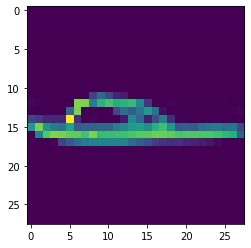

In [ ]:
plt.imshow(train_images[30])

In [ ]:
result = [[None for _ in range(3)] for _ in range(3)]

In [ ]:
result

[[None, None, None], [None, None, None], [None, None, None]]

In [ ]:
for i in range(14, 17):
  for j in range(0, 3):
    result[i-14][j] = train_images[30][i][j]

In [ ]:
result

[[51, 43, 27], [137, 202, 133], [0, 110, 186]]

In [ ]:
filter = [
          [-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]
]

In [ ]:
aSum = 0
for i in range(3):
  for j in range(3):
    aSum += filter[i][j] * result[i][j]

In [ ]:
aSum

154

In [ ]:
link = "https://cdn.shopify.com/s/files/1/1297/3303/products/20-vinyl-roll-up-chess-board-21184102209_grande.jpg?v=1575932012"


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=27fa31a125b3692872d2ecf1d69e0f152ba2fca2168ff7c20af9ed22a2363968
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'20-vinyl-roll-up-chess-board-21184102209_grande.jpg'

In [ ]:
import cv2

In [ ]:
image = cv2.imread('20-vinyl-roll-up-chess-board-21184102209_grande.jpg')

In [ ]:
grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(grey,grey.shape)

[[187 203 190 ...  32  33  34]
 [198 213 201 ...  31  32  33]
 [186 201 189 ...  29  30  31]
 ...
 [211 236 220 ... 211 215 221]
 [214 239 223 ... 219 222 229]
 [217 242 226 ... 225 228 235]] (499, 500)


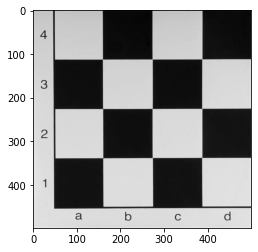

In [ ]:
import matplotlib.pyplot as plt

plt.gray()
plt.imshow(grey)

In [ ]:
filter = [
      [-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]
]

In [ ]:
m = len(grey)
n = len(grey[0])

In [ ]:
print(m)
print(n)

499
500


In [ ]:
import numpy as np
transformed = np.copy(grey)

In [ ]:
for i in range(1, m-1):
  for j in range(1, n-1):
    center_pixel = (i, j)
    center_filter = (1, 1)
    xs = [1, 1, 1, -1, -1, -1, 0, 0]
    ys = [1, -1, 0, 0, -1, 1, -1, 1]
    new_val = 0.0
    for k in range(8):
        new_x = center_pixel[0] + xs[k]
        new_y = center_pixel[1] + ys[k]

        filter_new_x = center_filter[0] + xs[k]
        filter_new_y = center_filter[1] + ys[k]

        new_val += grey[new_x][new_y] * filter[filter_new_x][filter_new_y]

    new_val += grey[i][j] * filter[1][1]
    
    if new_val < 0:
      new_val = 0

    if new_val > 255.0:
      new_val = 255.0

    transformed[i][j] = new_val




In [ ]:
filter_new_x

1

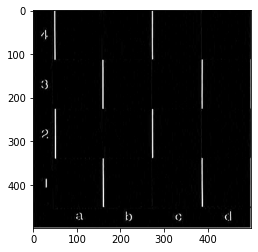

In [ ]:
plt.imshow(transformed)
plt.show()

In [ ]:
def maxpool(image):
  m = len(image)
  n = len(image[0])
  new_image = np.zeros((m//2 + 1, n//2 + 1))
  # new_image = [[0 for _ in range(n//2 +1)] for _ in range(m//2 +1)]
  xRows = [1, 1, 0]
  yCols = [0, 1, 1]
  
  for i in range(0, m, 2):
    for j in range(0, n, 2):
      currentPixels = [image[i][j]]
      for k in range(3):
        neighbor_x = i + xRows[k]
        neighbor_y = j + yCols[k]
        if neighbor_x < m and neighbor_y < n:
          currentPixels.append(image[neighbor_x][neighbor_y])
        new_image[i//2][j//2] = max(currentPixels)
  return new_image
      

In [ ]:
new_image = maxpool(transformed)


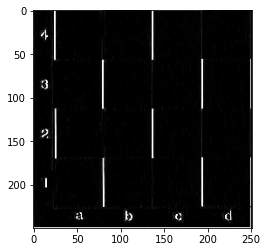

In [ ]:
plt.imshow(new_image)
plt.show()

[-2, 0, 2]